# Indian Crop Production Analysis

We came to know about this nice dataset on data.gov website about Indian seasonal crop production for states and districts dataset. The link for it: https://data.gov.in/resources/district-wise-season-wise-crop-production-statistics-1997/

Specific info about the dataset is given in the report pdf file. To avoid repeat of that section we encourage you to look at report file. Some analysis info is given in below markdowns. 

**`NOTE:`** We have included all necessary comments for code part so that one can understand what we are doing.

## Downloading the Dataset
The Dataset was downloaded using data.gov API in .csv format. For more info go to [data.gov](https://data.gov.in/). How we have obtained data is given in below block.
### what we are doing to get our datasets?
- first one needs an api-key to request full dataset. It is a simple sign-up process. 
- we include personal api-key in a `login.py` file as a variable
- import login and then access to use it
- we request this particular dataset in particular format
- as there are around 2.5 lakh data points we set upper-limit for api-url to 10 lakh to get whole dataset(trial and error)
    - it might differ for other datasets
- then we save requested content into a csv file
- to use dataset we read it from local stored datasets folder rather than requesting it again and again

Using above code from `data.py`, the dataset has been downloaded and extracted. We will use downloaded data in next sections.

## Data Preparation and Cleaning

Data preparation or Data preprocessing is very crucial step in a Data Science project pipeline. This process includes, accessing different variables and verifying the accuracy of data collected. Working on missing data(either deleting it or imputing with appropriate measures). Outliers are also datapoints which has to flagged and investigated if they are conducive for including in the analysis. `We have used standard data pre-processing taught in the class for our dataset cleaning.`

For further sections we will clean the dataset, so that we don't have hassle on it for the rest of project.



In [ ]:
# here we import all modules that we have used in this particular notebook
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
'''
read dataset
'''
filename = "/work/crop_production.csv" 
data=pd.read_csv(filename)

In [ ]:
'''
to get a peak on dataset
'''
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
print(data.shape)

(246091, 7)


#### observations:
**Dataset consists of 246091 rows and 7 columns**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


#### observations:
- from above block output it is quite clear that:
    **Column data types**

    Out of seven variables, we have 
    - **four** categorical variables
    (State_Name,District_Name, Season and Crop type) 
    - **three** continuous variables
    float(Area and Production) 
    - **one** integer
    int (Crop_Year)

**Checking for Missing Data**

In [ ]:
data.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [ ]:
f"{3730/246091*100:0.2f} %"

'1.52 %'

#### observations:
- clearly we have some missing point is `Production` col. 3730 NULL values **(1.32%)** are present in **Production** column. Others columns do no have null values.

In [ ]:
data.dropna(subset=["Production"],axis=0,inplace=True)

In [ ]:
data.shape

(242361, 7)

#### observations:
- before with NULL values(in `Production` col) we had `246091` data-points, now after dropping them we have `242361` sample size.

In [ ]:
# now there is no NULL values in dataset :)
data.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

### variable correlation
- it is imp to know, if some of the features are co-related to each other or not. To check that we do a simple Pearson correlation check on numerical vatiables.

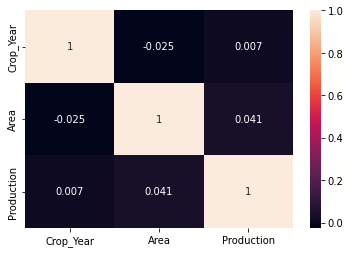

In [ ]:
plt.tick_params(labelsize=10)
sns.heatmap(data.corr(),annot=True);

#### observations:
- There is no variable showing high correlation with any other variable in the dataset.

## **Variable Analysis**

#### Which states are present in dataset?
**State Variable**

In [ ]:
data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
STATES=list(data.State_Name.unique()) # store o/p in global var
pd.DataFrame({'state-names':STATES})

,state-names
0,Andaman and Nicobar Islands
1,Andhra Pradesh
2,Arunachal Pradesh
3,Assam
4,Bihar
5,Chandigarh
6,Chhattisgarh
7,Dadra and Nagar Haveli
8,Goa
9,Gujarat


In [ ]:
print(''.center(50,'='))
print('there are total -- ',data.State_Name.nunique(),' states in this crop production dataset.')
print(''.center(50,'='))

there are total --  33  states in this crop production dataset.


### Which state(overall) has more samples in dataset?
This dataset encodes agriculture data for 33 Indian states (including Union Territory).
DataFrame.value_counts() helps to see the quantum of levels present. As seen below, we have more data from top agriculture rich states like Uttar Pradesh, Madhya Pradesh and Karnatake than other states. One reason along with being top agriculture rich states, these states also have more population, districts, and area than other states. For example, Punjab, Hariyana etc are also agriculture rich states but these states are small in are and population; also they have less number of districts so having less number of sample occurance does make sense. 

In [ ]:
# this shows how many times a state has 
data.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Jharkhand                       1266
Manipur                         1266
Mizoram                          954
P

#### Which districts are present in dataset?
**District Variable**

In [ ]:
print(''.center(50,'='))
print('there are total -- ',data.District_Name.nunique(),' states in this crop production dataset.')
print(''.center(50,'='))

there are total --  646  states in this crop production dataset.


#### observations:
- For 33 Indain states on further dissecting we get data for 646 different districts.

In [ ]:
data.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [ ]:
data.District_Name.value_counts()

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
RAMGARH        6
KHUNTI         6
NAMSAI         1
MUMBAI         1
Name: District_Name, Length: 646, dtype: int64

#### observations:
On District front, we have have more data coming from Tumkur, Belgaum, Hassan, Bellary and Bijapur from Karantaka state.

**Crop Year Variable**

In [ ]:
print(data.Crop_Year.nunique())
print(data.Crop_Year.min())
print(data.Crop_Year.max())
print(data.Crop_Year.value_counts())

19
1997
2015
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64


#### observations:
- Our Dataset has data for 19 years from 1997 to 2015. Top years are 2003, 2002, 2007-08 and 2006. For year 2003 we have around `17200` data points. IF data reporting is supposed equal from each part of the country then it should have been almost equal for all years. But it is not. Seems that other practical aspects like(to note a few) tech improvement over the years, data handling by govt departments and specifically data not being reporteed from ground level.

**Season Variable**

In [ ]:
print(data.Season.nunique())
print(data.Season.unique())
print(data.Season.max())
print(data.Season.value_counts())

6
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']
Winter     
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64


#### observations:
Dataset talks of six different seasons i.e. Kharif, Annual, Autumn, Rabi, Summer and Winter crops with `more crops yielding in Winter.` Frequency wise, we have more datapoints from Kharif, Rabi and Annual crop types.

Little information about different crops types:
The kharif cropping season is from July –October during the south-west monsoon and the Rabi cropping season is from October-March (winter). The crops grown between March and June are summer crops. Crops in India are dependent on Monsoon water. There will be variation in crop production from one year to another. Although we can infer(on surface) some info about different season crop productions, for deeper understanding we might have to analyse year wise time-series datasets. And these types of quality dataset are not available that easily. 

**Crop Variable:**

In [ ]:
print(data.Crop.nunique())
print(data.Crop.unique())
print(data.Crop.max())
print(data.Crop.value_counts().head(20))

124
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Mo

In [ ]:
print(''.center(50,'='))
print('these three crops have most occurances in dataset:')
print('Rice\nMaize\nMoong(Green Gram)')
print(''.center(50,'='))


these three crops have most occurances in dataset:
Rice
Maize
Moong(Green Gram)


#### observations:
Dataset shows data for 124 different crop varieties. On doing df.value_counts(), we can show top crops are Rice(15082),Maize(13787) and Moong(Green Gram, 10106).

**Area Column:** Area under cultivation

In [ ]:
data.Area.describe().apply(lambda x: format(x, '0.3f'))

count     242361.000
mean       12167.414
std        50857.440
min            0.100
25%           87.000
50%          603.000
75%         4545.000
max      8580100.000
Name: Area, dtype: object

**Production Column**

In [ ]:
data.Production.describe().apply(lambda x: format(x, '0.3f'))

count        242361.000
mean         582503.442
std        17065813.172
min               0.000
25%              88.000
50%             729.000
75%            7023.000
max      1250800000.000
Name: Production, dtype: object

In [ ]:
data.Production.max()

1250800000.0

#### observations:
- Production values range from 0(min) to 1250800000(max)

In [ ]:
data.Production.value_counts(ascending = False)

1.0        4028
0.0        3523
100.0      3521
2.0        2964
3.0        2311
           ... 
14490.0       1
6856.4        1
192.2         1
2498.1        1
16678.0       1
Name: Production, Length: 51627, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242361 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.8+ MB


#### observations:
- we can clearly infer from below box-plots that **Area and Production** columns are highly skewed with lot of outliers. It does make sense; most of Indian farmers cultivate on small farm lands unlike other developed countries where there are cutivation companies that do the farming; there are rarely farms that big in India. We will do analysis about this in next sections. And as Production does follow area we can make sense about its skewness also.

Text(0.5, 1.0, 'Area Outliers')

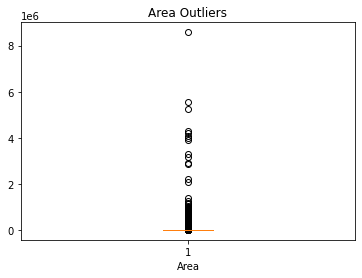

In [ ]:
plt.boxplot(data.Area)
plt.xlabel('Area')
plt.title("Area Outliers")

Text(0.5, 1.0, 'Production Outliers')

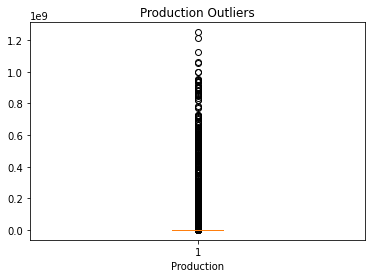

In [ ]:
plt.boxplot(data.Production)
plt.xlabel('Production')
plt.title("Production Outliers")

### **Bivarate Analysis**

In [ ]:
# first we will look at state-wise production quantum for 19 years for which we do have data
data.groupby(by = data.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(5).reset_index(drop=True)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,State_Name,Production
0,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
2,Tamil Nadu,1.207644e+10
3,Uttar Pradesh,3.234493e+09
4,Assam,2.111752e+09


In [ ]:
data.groupby(by = data.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = True).head(5).reset_index(drop=True)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State_Name,Production
0,Chandigarh,63956.50
1,Mizoram,1661539.83
2,Dadra and Nagar Haveli,1847871.00
3,Sikkim,2435735.00
4,Manipur,5230917.00


#### observations:
- Kerala is top state when we look at the quantum of Production for last 19.years. Also notice that top three states re from the south side belt in terms of production. Keep in mind that area(size) of particular state also gives top rank to some states. It is not quite bias-free but it is useful.
### [To be written for bottom states]

Text(0.5, 1.0, 'Quantum of Production')

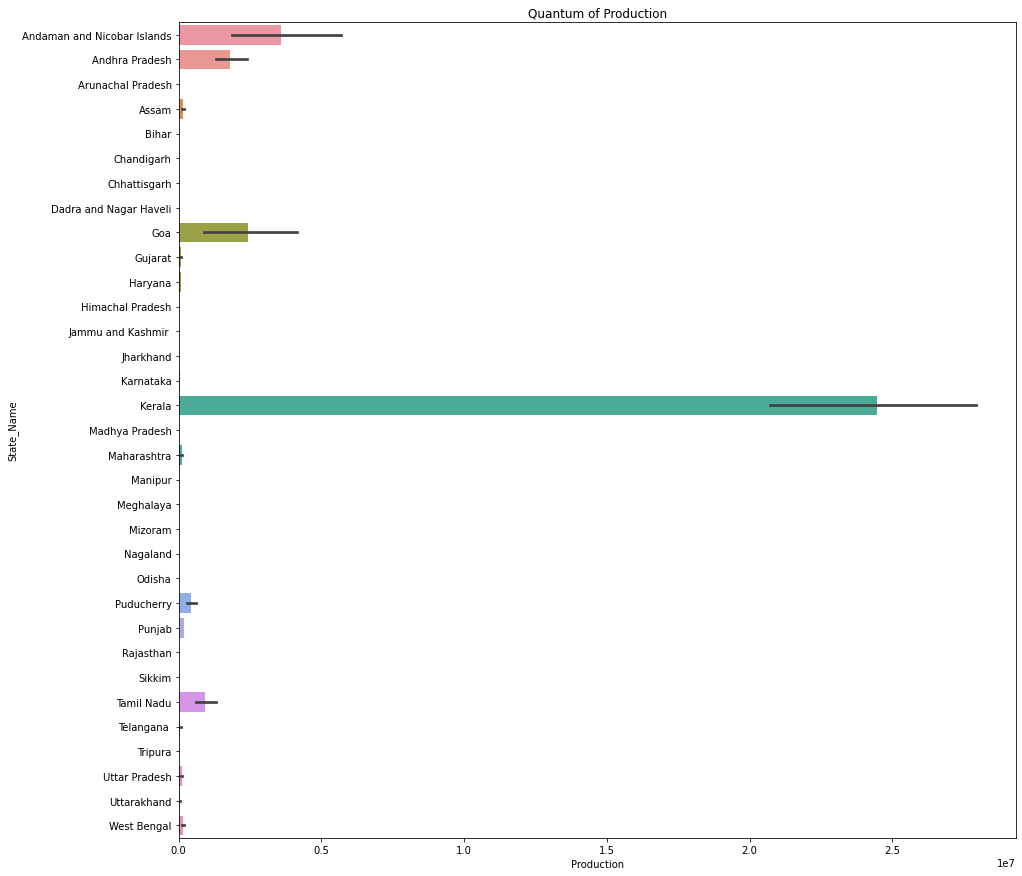

In [ ]:
plt.figure(figsize= (15,15))
sns.barplot(x=data['Production'],y= data["State_Name"], orient='h')
plt.title("Quantum of Production")

### EDA and Plots

Dataset has been preprocessed. Exploring all the variables and their levels(for categorical variables) for extracting important insights.



In [ ]:
# imports
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
data.describe().apply(lambda s: s.apply(lambda x: format(x, '0.3f')))

,Crop_Year,Area,Production
count,242361.000,242361.000,242361.000
mean,2005.626,12167.414,582503.442
std,4.958,50857.440,17065813.172
min,1997.000,0.100,0.000
25%,2002.000,87.000,88.000
50%,2006.000,603.000,729.000
75%,2010.000,4545.000,7023.000
max,2015.000,8580100.000,1250800000.000


Text(0.5, 0, 'Area')

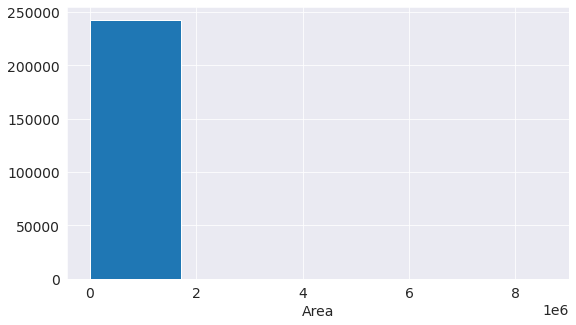

In [ ]:
plt.hist(data.Area, bins = 5)
plt.xlabel('Area')

Text(0.5, 0, 'Production')

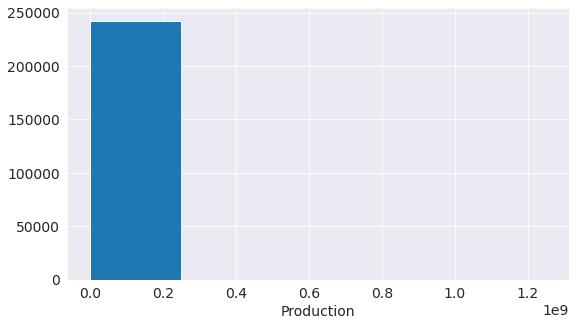

In [ ]:
plt.hist(data.Production, bins = 5)
plt.xlabel('Production')

### Creating Additional Variables

Looking at the seven variables, we could extract more information if new variable could be created using present variables. Based on:
- **Different zones** (Union Territory, South Zone, NE Zone, East Zone, North Zone, Central Zone and West Zone)
- **Different caterories** (Cereal, Pulses,Fruits,Beans,Vegetables, Spices, fibres, Nuts, Natural Polymer,Coffee, Tea, Total foodgrain, Pulses, Oilseeds, Paddy, Commercial, Sugarcane, forage plants and Others)
- Note that we have considered UTs seperately from states, to make comparision interpretable and fair.
- All regionshave been constructed manually, if one wants to change states in region, one can simply edit below code block.

In [ ]:
#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [ ]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

data['Zones'] = data.apply(get_zonal_names, axis=1)
data['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [ ]:
data.Zones.value_counts()

South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: Zones, dtype: int64

### Based on Crop Category

In [ ]:
cereals = ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']
pulses = ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
        'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
        'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
        'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']
fruits = ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']
               
beans = ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']

vegetables = ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']

spices = ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']

fibres = ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']

nuts = ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']

oilseeds = ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']

commercial = ['Tobacco','Coffee','Tea','Sugarcane','Rubber']

In [ ]:
crop=data['Crop']
def crop_category(crop):
    if crop in cereals:
        return 'Cereal'
    if crop in pulses:
        return 'Pulses'
    if crop in fruits:
        return 'Fruits'
    if crop in beans:
        return 'Beans'
    if crop in vegetables:
        return 'Vegetables'
    if crop in spices:
        return 'spices'
    if crop in fibres:
        return 'fibres'
    if crop in nuts:
        return 'Nuts'
    if crop in oilseeds:
        return 'oilseeds'
    if crop in commercial:
        return 'Commercial'

data['cat_crop']=data['Crop'].apply(crop_category)

In [ ]:
crop=data['Crop']
def crop_category(crop):
    cropTypes = {
        'Cereal': ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster'],
        'Pulses': ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram'],
        'oilseeds': ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total'],
        'Vegetables': ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia'],
        'spices': ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other'],
        'Nuts': ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut'],
        'Commercial': ['Tobacco','Coffee','Tea','Sugarcane','Rubber'],
        'fibres': ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp'],
        'Beans': ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram'],
        'Fruits': ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana'],
    }
    result = None
    for ctype in cropTypes:
        if crop in cropTypes[ctype]:
            result = ctype
            break
    return result

data['cat_crop']=data['Crop'].apply(crop_category)


Looking at the new variable cat_crop, top frequency of crop types are Cereal, Pulses and oilseeds.

In [ ]:
data["cat_crop"].value_counts()

Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: cat_crop, dtype: int64

In [ ]:
# copy for exploration
data_ex = data.copy()

### **Visualization on Important variables**:

## 1. Zonewise 



* **South India** has maximum production 

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Zone-Wise Production: Total')

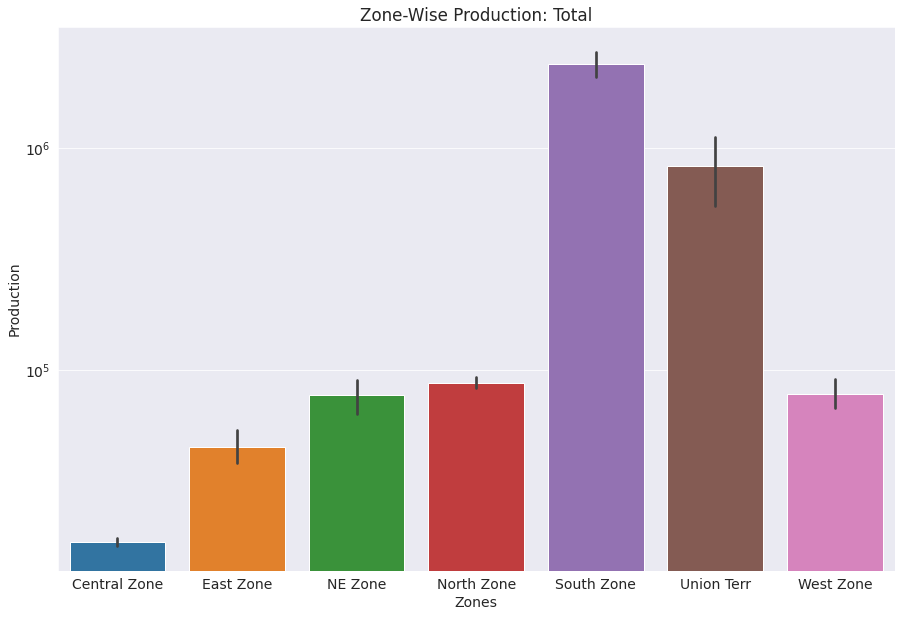

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data_ex.Zones.sort_values(ascending=True), data_ex.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

State-wise Exploration of **South India**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Southern-Zone Production')

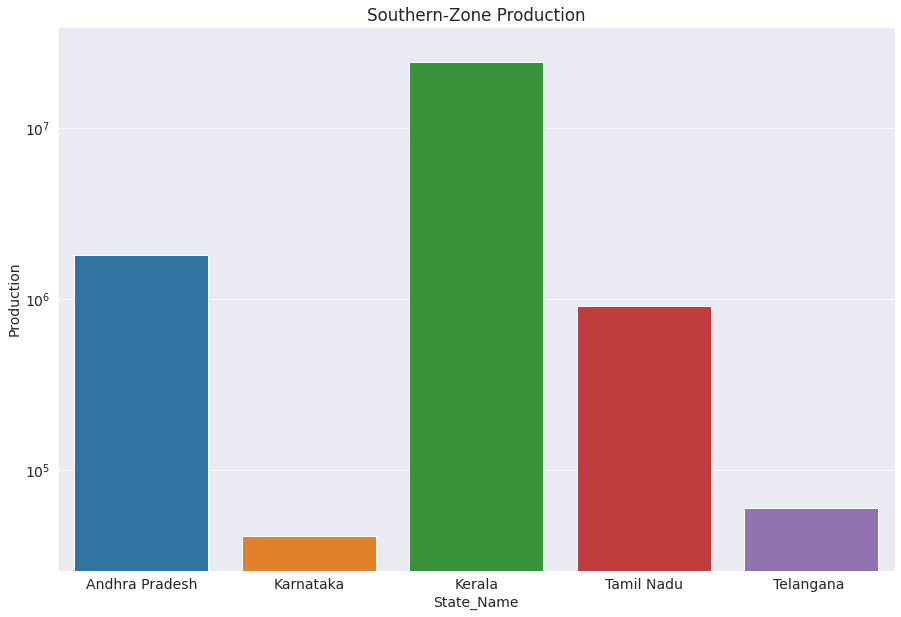

In [ ]:
south_zone =  data_ex[(data_ex["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(south_zone.State_Name, south_zone.Production,errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone Production')

**Top 3** South Indian states are 
- Kerala
- Andhra Pradesh 
- Tamil Nadu.

## 2. Crop Wise

Top Crops Production wise are: Coconut, Sugarcane and Rice.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Overall Crops vs Production')

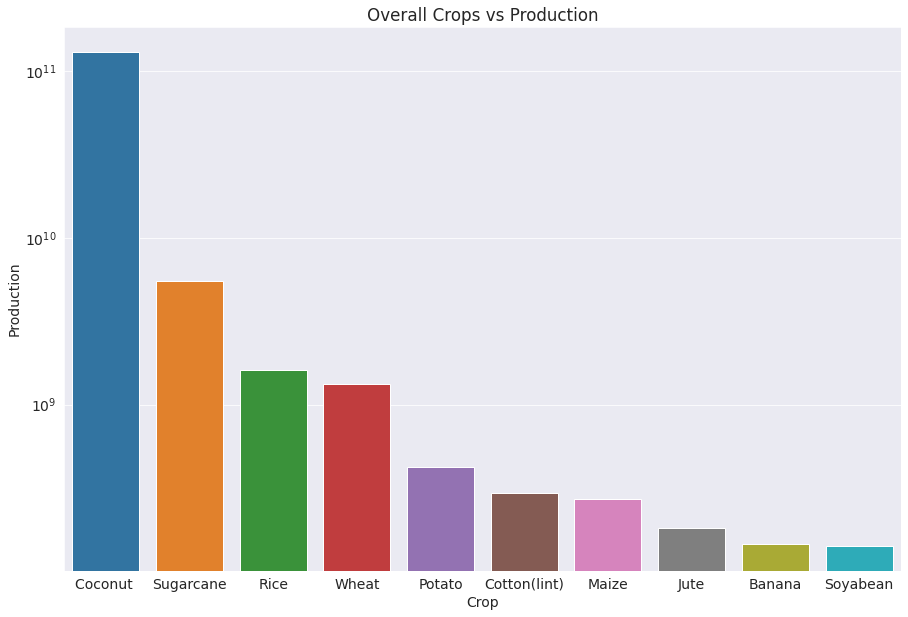

In [ ]:
#Overall Crop Production
crop = data_ex.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop 
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(crop.Crop, crop.Production)
plt.yscale('log')
plt.title('Overall Crops vs Production')

## 3. Yearwise:

Top production years are 
- 2011
- 2013
- 2014.

<AxesSubplot:xlabel='Crop_Year'>

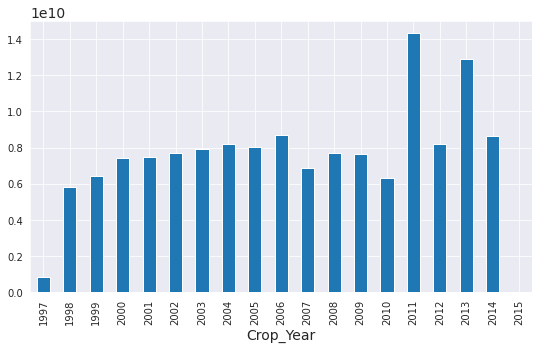

In [ ]:
plt.tick_params(labelsize=10)
data_ex.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

## 4. Season wise:

Top crop categories which shows high production values are Whole Year(Annual growing plants),Kharif  and Rabi crops. It clearly shows these crops heavily dependent on seasonal monssons.

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Seasonal Crops vs Production')

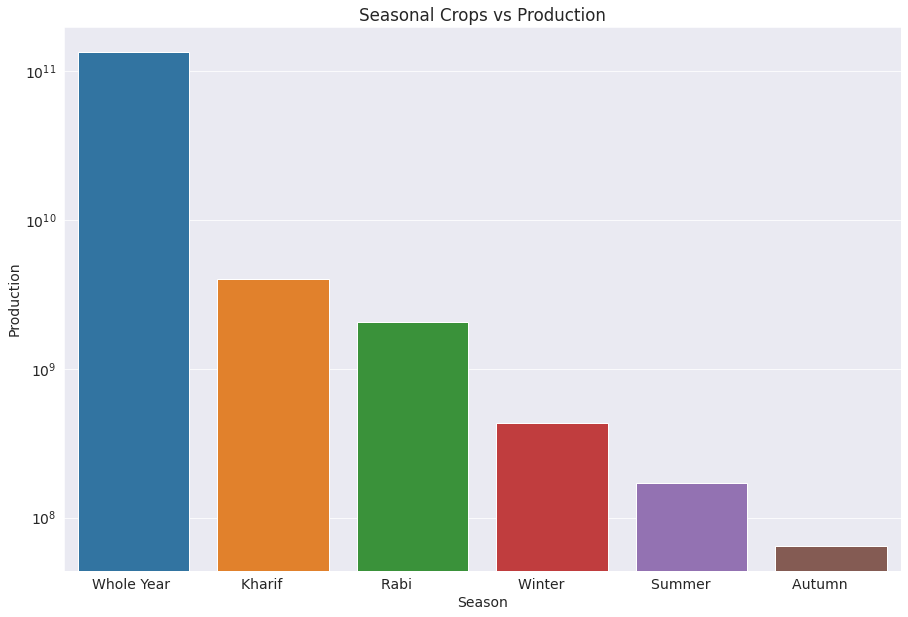

In [ ]:
#Season vs Production 
df_season=data_ex.copy()
season = df_season.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(season.Season, season.Production,errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

## 5. Crop Type wise Production plot 


Top crop categories are Cereal, Pulses and Oilseeds.

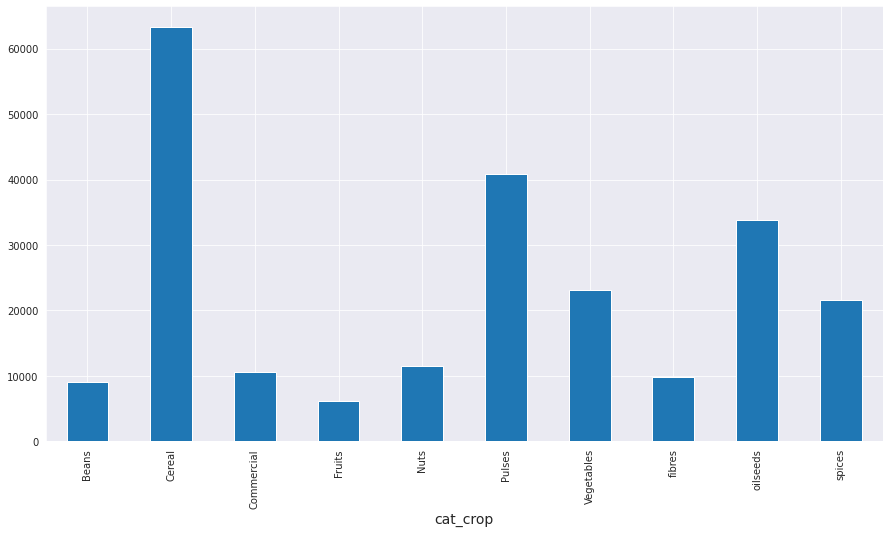

In [ ]:
plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
data_ex.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

## 6. State versus Crop Category vs Season:

Interesting facts:
* South zone:
i. Top producing state Kerela shows a abundance of whole year seasonal crops
* North Zone:
ii. Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summar crops

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


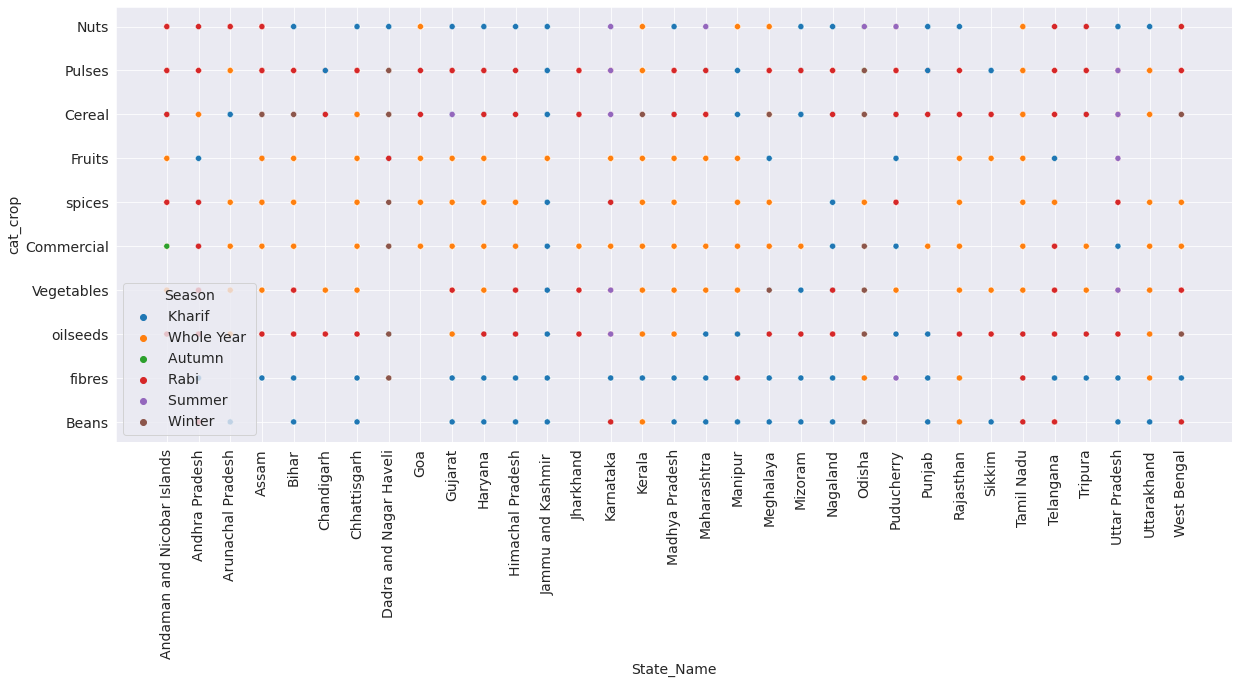

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data_ex,x="State_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
plt.show()

## 7. Category Wise:

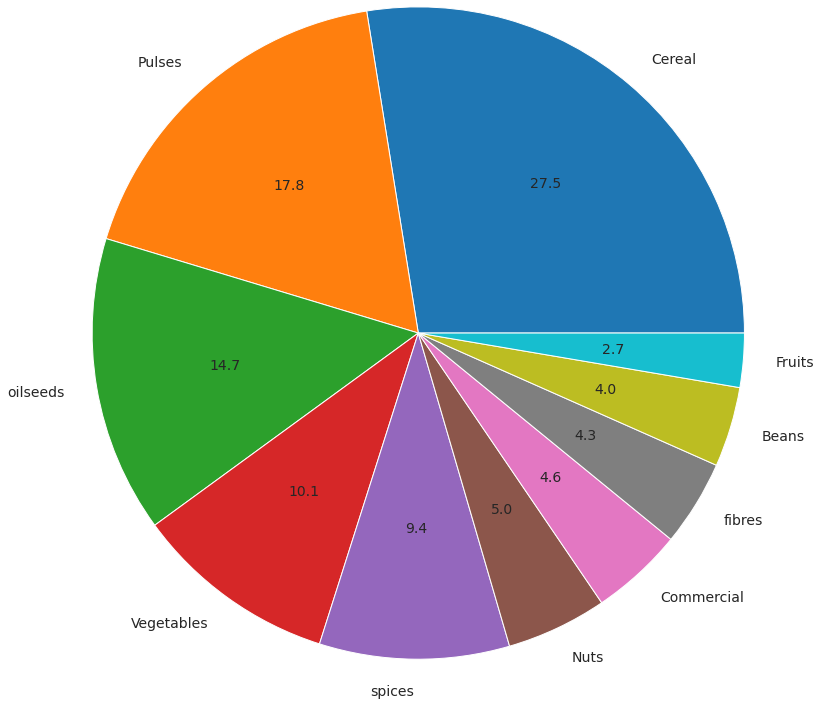

In [ ]:
df1=data_ex["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

#### Task1 : Find states dominating in each category of crop

-> Table using State Name and Crop categories

-> Construct bar plot.


In [ ]:
df_2 = pd.crosstab(data_ex['State_Name'], data_ex['cat_crop'])
df_2

cat_crop,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,9,20,0,11,52
Andhra Pradesh,386,2264,474,502,674,1336,1046,333,1101,802
Arunachal Pradesh,26,1021,168,0,26,67,257,0,343,637
Assam,0,2952,854,920,400,2234,1781,1284,2097,1338
Bihar,280,6108,756,226,130,3731,1775,924,2504,1396
Chandigarh,0,39,0,0,0,14,26,0,7,0
Chhattisgarh,646,1805,316,264,261,2087,1143,535,1496,1288
Dadra and Nagar Haveli,0,116,12,9,9,64,0,13,30,1
Goa,0,62,22,16,47,32,0,0,0,12


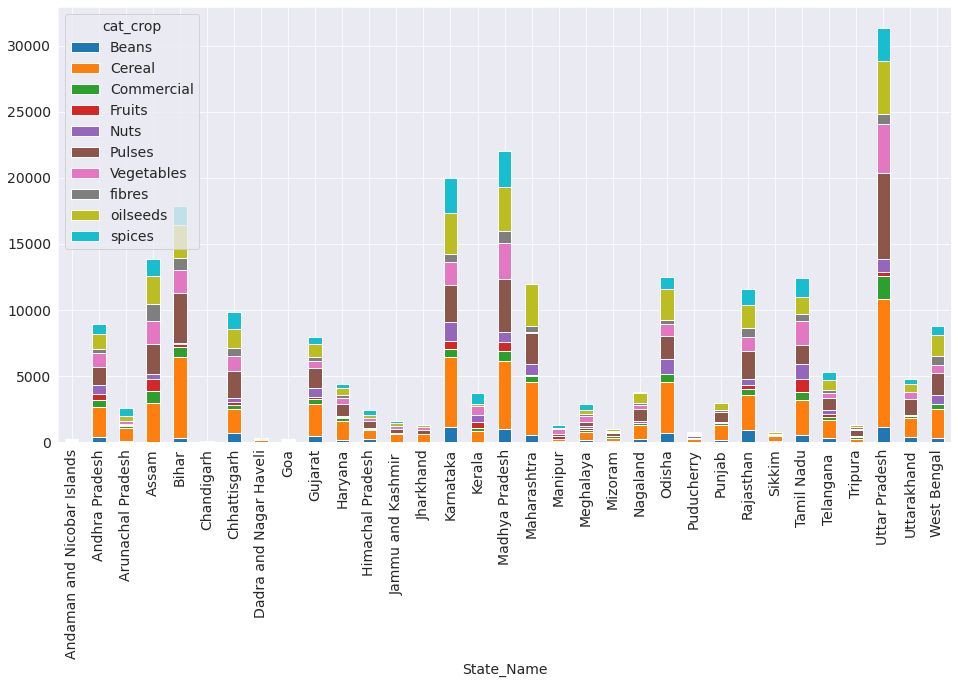

In [ ]:
df_2.plot(kind='bar', stacked=True, figsize = (16,8));

####  Task1 Result :

Most of the crop categories are dominated by **Uttar Pradesh**

#### Task 2: Most frequent crop and its geography. 

-> Find the high frequency crop in the dataset.

-> Making a season of data only for that crop

-> Finding out the season when it is grown heavily

-> Finding out which state predominately produces it

-> Finding out which District produces this crop highly

-> Finding out which year the production figures are high

-> Finding out Area versus Production relationship for this crop production

In [ ]:
data_ex["Crop"].value_counts()[:5]

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64

In [ ]:
rice_df = data_ex[data_ex["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,Union Terr,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,Union Terr,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,Union Terr,Cereal


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


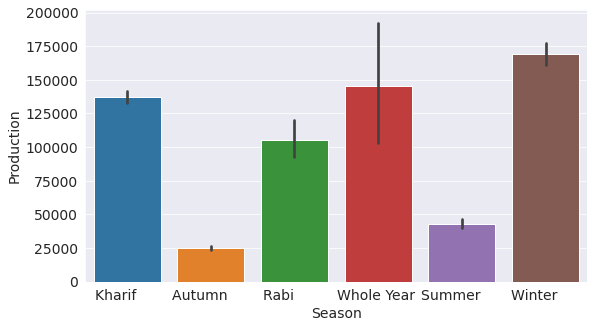

In [ ]:
sns.barplot("Season","Production",data=rice_df);

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


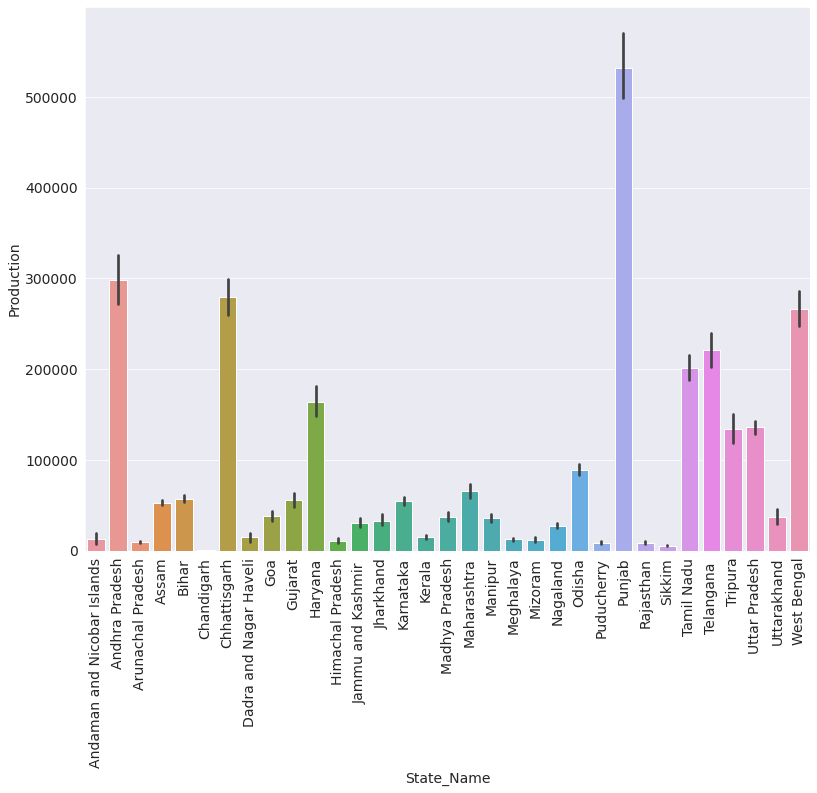

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:10]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:10]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794
325,KRISHNA,20280606.0,1.263219
90,BIRBHUM,19753571.0,1.230391
347,LUDHIANA,18950000.0,1.180339
386,MURSHIDABAD,18403217.0,1.146282
214,GUNTUR,18245831.0,1.136479


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


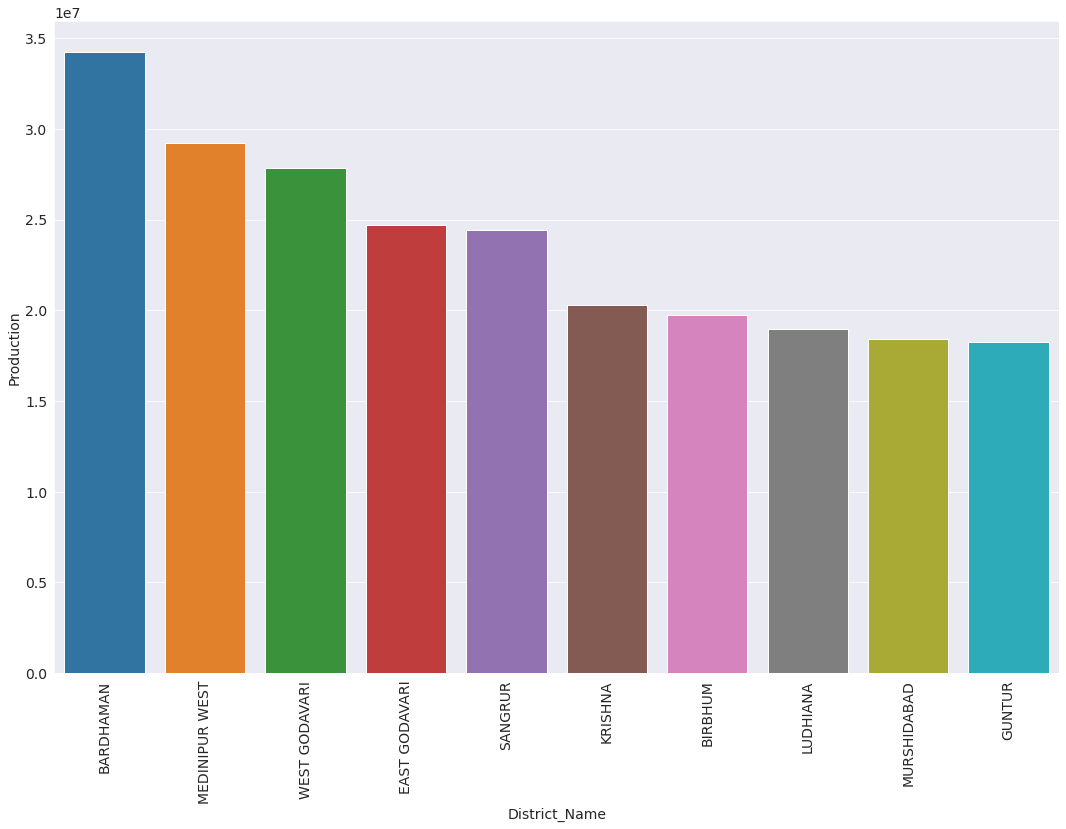

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_rice_pro_dis[:10])
plt.xticks(rotation=90)
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


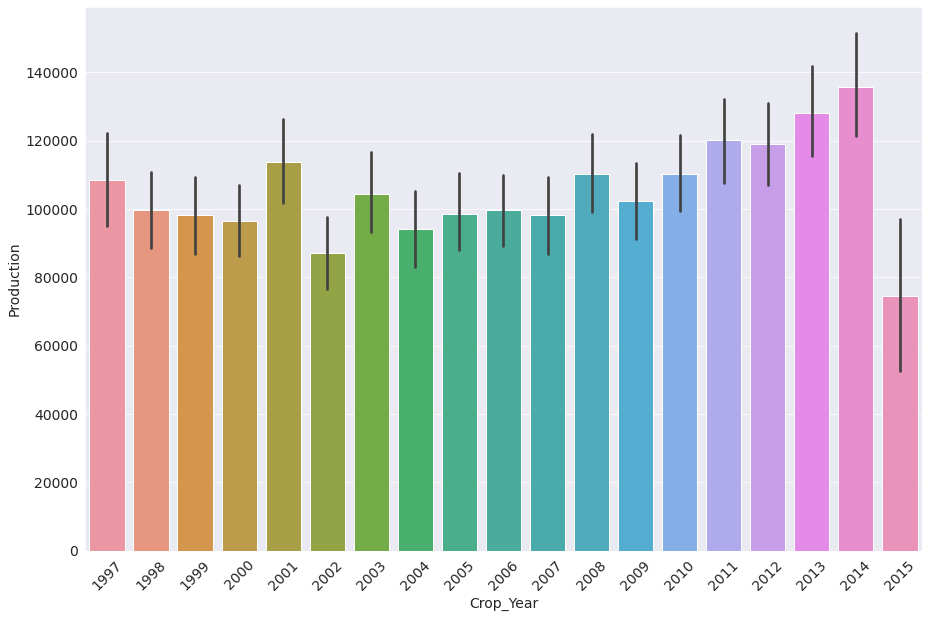

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=rice_df)
plt.xticks(rotation=45)
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


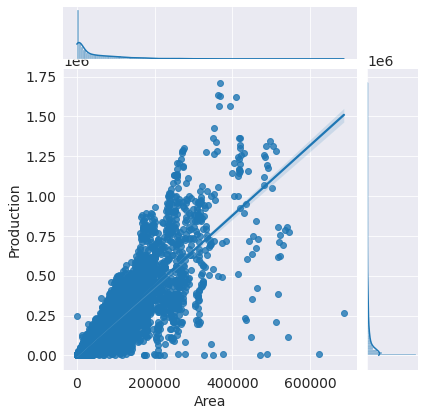

In [ ]:
sns.jointplot("Area","Production",data=rice_df,kind="reg")

#### Results 2:

1. Rice is grown heavily when we look the frequency of crops in India

2. Winter season is most importent for rice

3. **Statewise** Punjab dominates in rice production

4. **District wise** its BARDHAMAN(2.13%), MEDINIPUR WEST(1.8%) and WEST GODAVARI(1.73%) which contributes to total rice production.

5. **Yearwise** 2014 is the year when production reached the peak production

6. Correlation between Area and Production shows high production is directly proportional to Area under cultivation.

#### Tak 3: Area wise analysis of states

-> Find the state where Area under crop production is high and get top 10 states

-> Make a subset of the data with the above conditional data

-> Look the cultivation status of these states yearwise

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,State_Name,Area
30,Uttar Pradesh,4.336223e+08
16,Madhya Pradesh,3.297913e+08
17,Maharashtra,3.221860e+08
25,Rajasthan,2.687882e+08
32,West Bengal,2.154030e+08
14,Karnataka,2.029086e+08
9,Gujarat,1.549261e+08
1,Andhra Pradesh,1.315073e+08
4,Bihar,1.282695e+08
24,Punjab,1.267152e+08


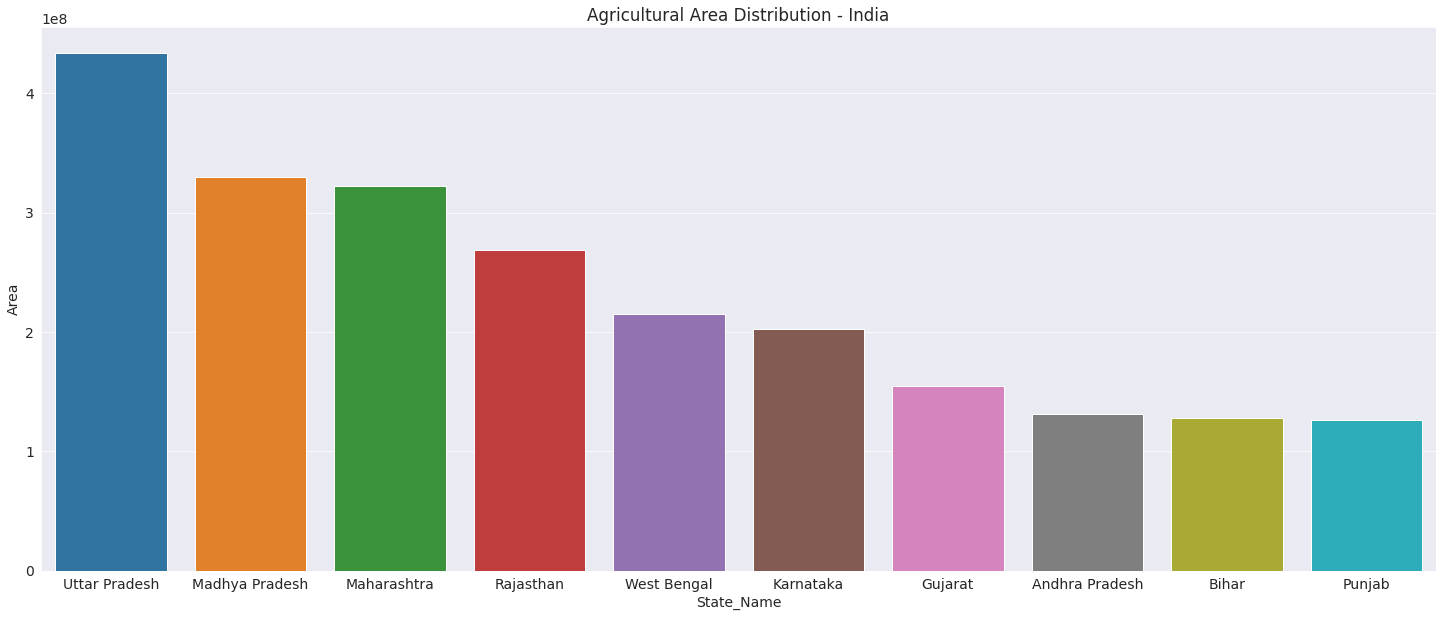

In [ ]:
df = data_ex.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
df.head()

fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(df.State_Name.head(10), df.Area.head(10), errwidth=0)
plt.title('Agricultural Area Distribution - India')
df.head(10)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  Future

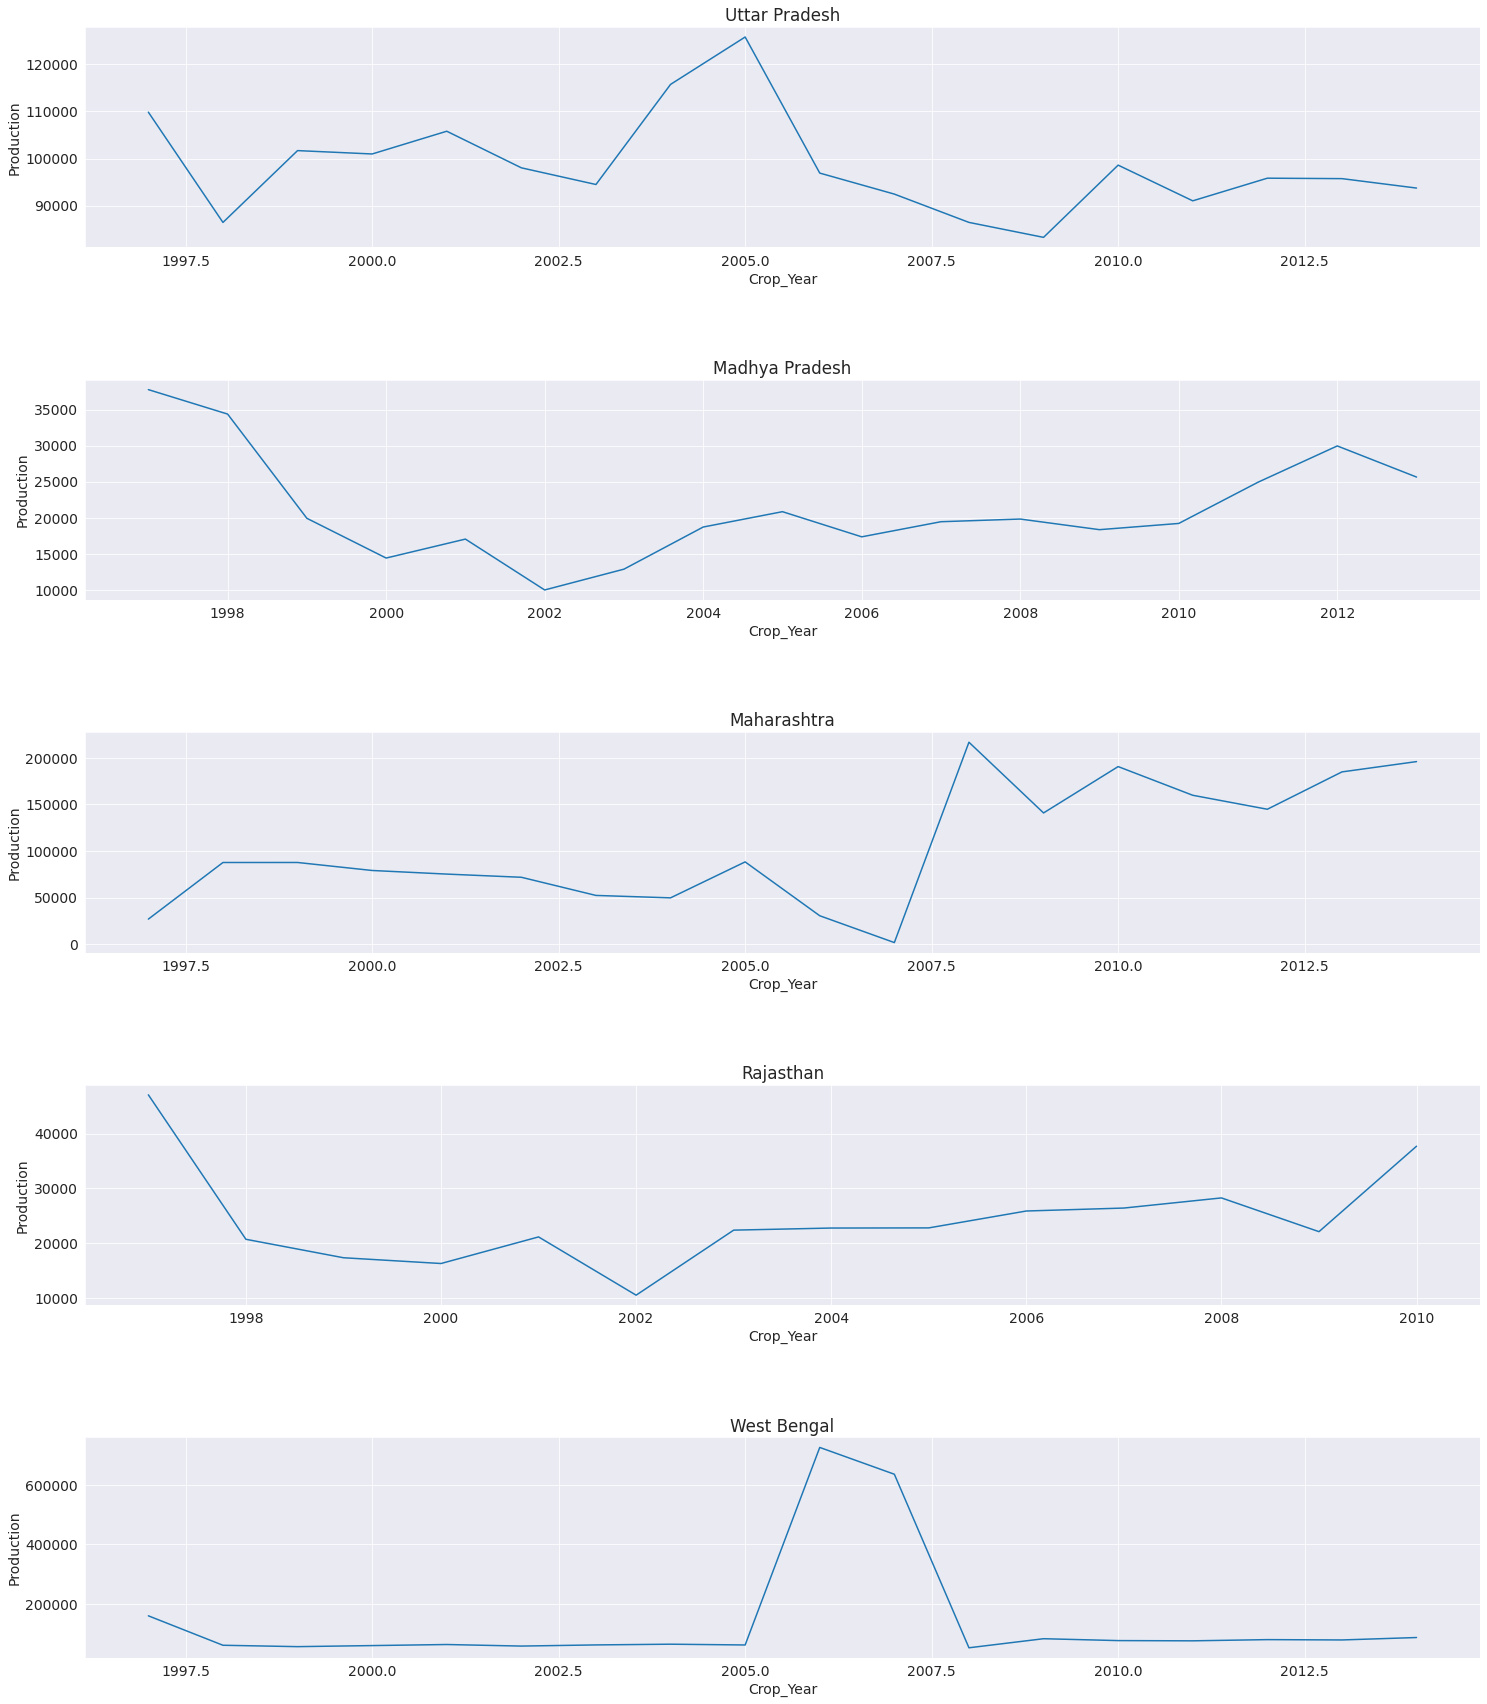

In [ ]:
df = data_ex.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
df = df.head(5)

fig, ax = plt.subplots(figsize=(25,30), sharey='col')
count = 1

for state in df.State_Name.unique():
    plt.subplot(len(df.State_Name.unique()),1,count)
    sns.lineplot(data_ex[data_ex.State_Name==state]['Crop_Year'],data_ex[data_ex.State_Name==state]['Production'], ci=None)
    plt.subplots_adjust(hspace=0.6)
    plt.title(state)
    count+=1;

#### Results 3:

-> Top cultivating states based on the Cultivation area are: Uttar Pradesh(4.33e+08), Madhya Pradesh(3.29e+08) and Maharashtra(3.22e+08)

-> Yearwise Statues of these States:
  
  a. Uttar Pradesh: High Production was seen in 2005 and after that it's been reducing gradually.

  b. Madhya Pradesh:1998 showed a high production and then there was gradual reduction but it picked up and 2012 also showed a peak in Production

  c. Maharashtra:Production went down drastically in 2006 and again the levels went up and hit a  high peak after 2007

  d. Rajasthan: the production hit a all time low in the year 2002 and then picked up by 2010

  e. West Bengal:the production hit a peak around 2006 but it has hit a low after 2007 and never recovered back.

#### Task 4: Analysis of Northern parts of India

-> Extract North zone data as a subset

-> Explore the top states of North which show high crop production stats

-> Explore the top crops grown in North India

In [ ]:
data_ex.Zones.value_counts()

South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: Zones, dtype: int64

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


,State_Name,Production
5,Uttar Pradesh,3.234493e+09
4,Punjab,5.863850e+08
1,Haryana,3.812739e+08
6,Uttarakhand,1.321774e+08
2,Himachal Pradesh,1.780517e+07
3,Jammu and Kashmir,1.329102e+07
0,Chandigarh,6.395650e+04


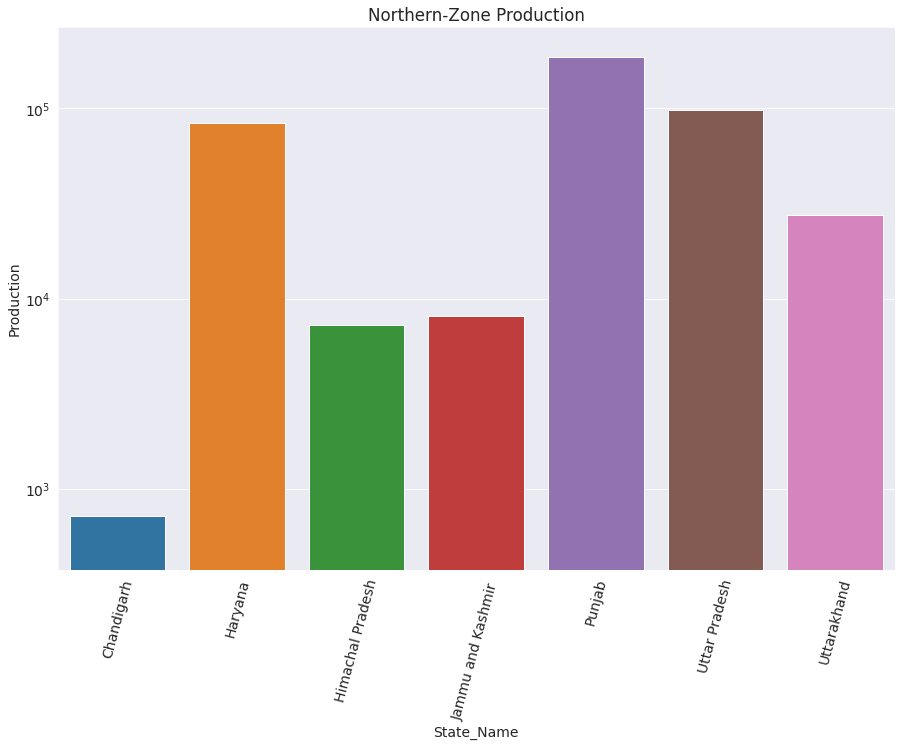

In [ ]:
North_zone =  data_ex[(data_ex["Zones"] == 'North Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(North_zone.State_Name, North_zone.Production,errwidth=0)
plt.xticks(rotation=75);
plt.yscale('log')
plt.title('Northern-Zone Production')

North_zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'North Zone Crops vs Production')

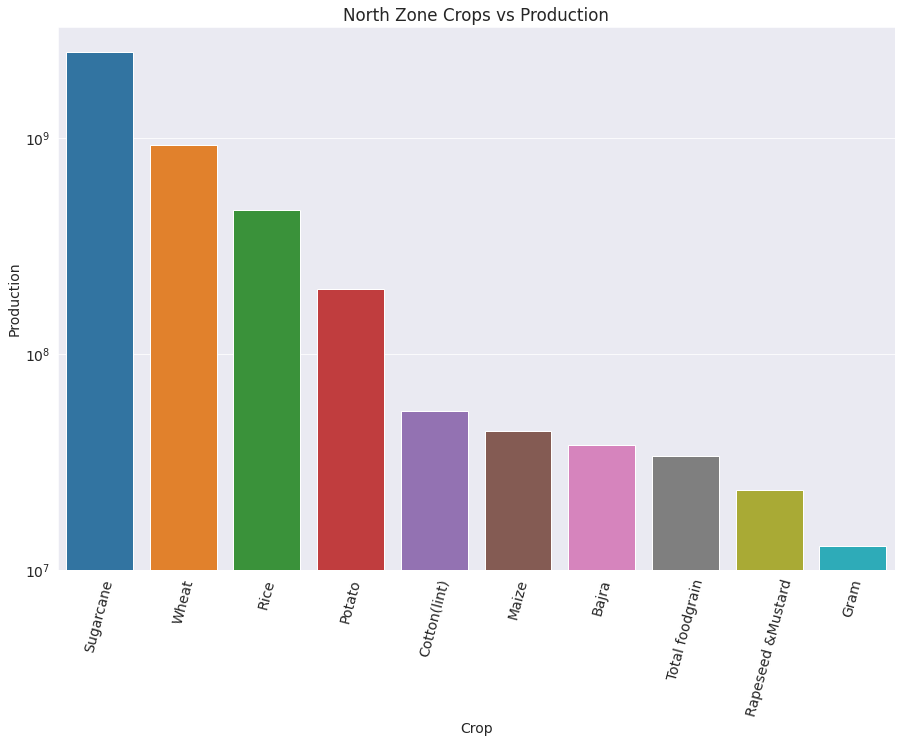

In [ ]:
df3 = North_zone.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df3.Crop, df3.Production,errwidth=0)
plt.xticks(rotation=75);
plt.yscale('log')
plt.title('North Zone Crops vs Production')

#### Results 4:

1. Production wise top states of North zone are:
* Punjab(5.86e+08)
* Uttar Pradesh(3.23e+09), and 
* Haryana(3.81e+08)

2. Top crops of these states are:
* Sugarcane,
* Wheat and 
* Rice



#### Task 5: Analysis of South India

-> Draw a subset of data for Coconut Production in India

-> Find the conducive season for coconut production

-> Explore the states involved in coconut production

-> Explore the southern district involved in coconut production

-> Find the cultivation status of coconut yearwise

-> Find the Area under cultivation in South India

In [ ]:
coc_df = data_ex[data_ex["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,Union Terr,None
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,Union Terr,None
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,Union Terr,None


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Season', ylabel='Production'>

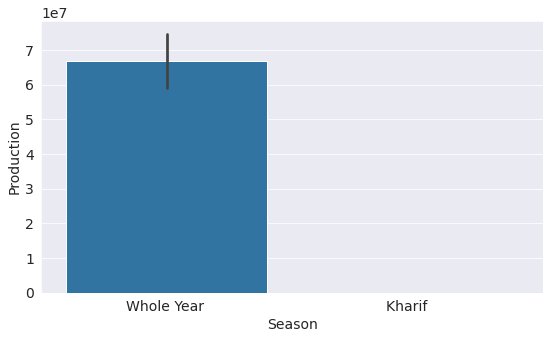

In [ ]:
sns.barplot("Season","Production",data=coc_df)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


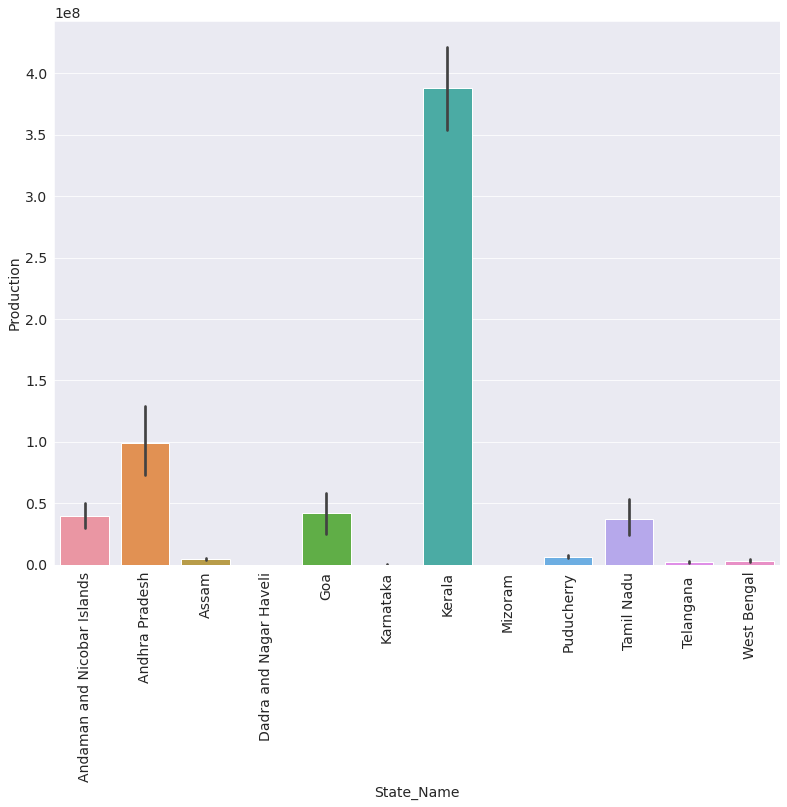

In [ ]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


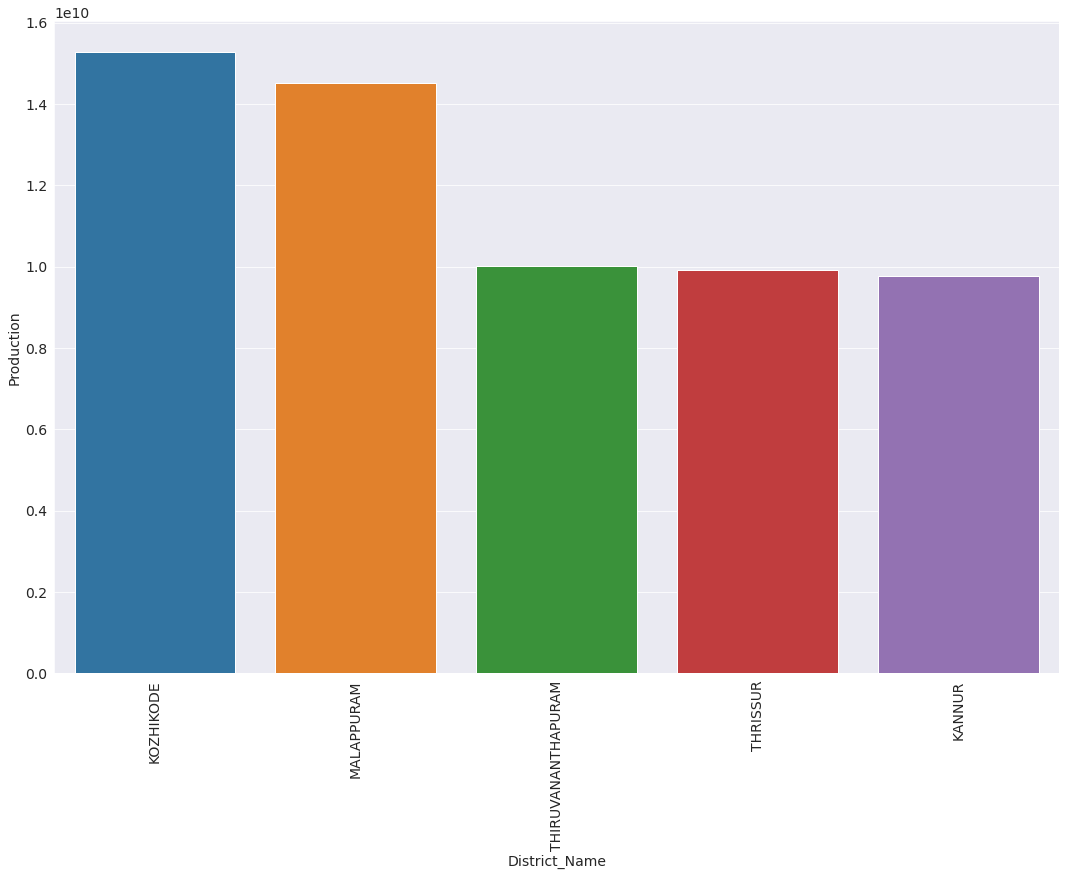

In [ ]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_coc_pro_dis[:5])
plt.xticks(rotation=90)
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


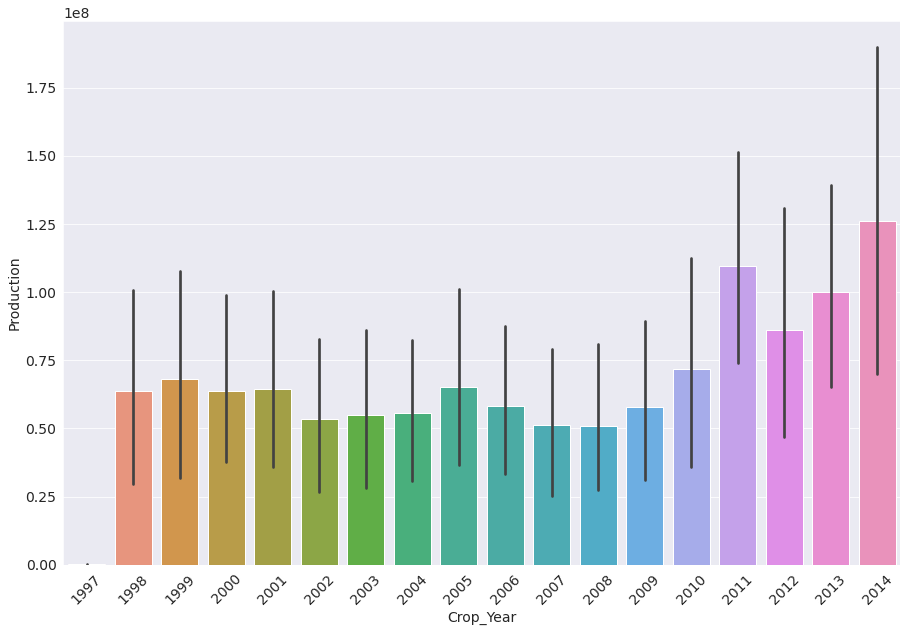

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=coc_df)
plt.xticks(rotation=45)
#plt.legend(rice_df['State_Name'].unique())
plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


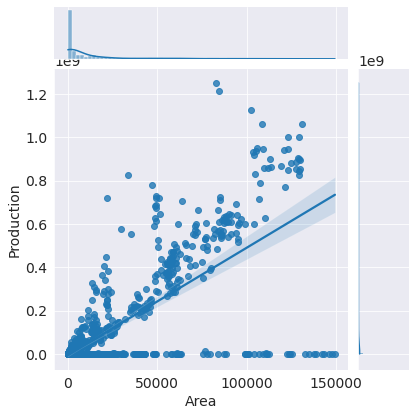

In [ ]:
sns.jointplot("Area","Production",data=coc_df,kind="reg")

#### Results 5:

1. Coconut cultivation is yearlong and doesn't get restricted to any particular seasons

2. Top states involved in coconut production are: Kerala, Andhra Pradesh and Tamil Nadu

3. Top districts featuring in coconut production is KOZHIKODE(11.75%), MALAPPURAM(11.16%) and THIRUVANANTHAPURAM(7.7%)

4. Yearwise coconut cultivation is strong and its increasing healthly

5. High coconut cultivation is directly proportional to area under cultivation.



## Inferences and Conclusion

We started with 246091 samples wih 7 columns. Production Variable had 3730 (1.5% of total sample size) missing values which was dropped and working 
dataset has 242361 sample size.
Also checked for multicollinearity of variables using heatmap.

**Univarate Analysis:**

> 1. State_Name: 33 Names including Union territories. Top states contributing to dataset are Uttar Pardesh, Madhya Pradesh and Karnataka

> 2. District_Name: 646 districts are represented in the dataset and Top contributors are Tumkur, Belgaum and Bijapur from Karnataka

> 3. Crop_Year: Dataset represents data for 19 years from 1997 to 2015 and maximum data from 2003, 2002 & 2007

> 4. Season: we see six seasons with maximum data from Kharif, Rabi and Whole year

> 5. Crop: we data for 124 different crops with top occurrence from Rice, Maize and Moong(Green Gram)

> 6. Area: Huge margin area used for production from 1 to 8580100 unit area. Distribution is highly right skewed due to lot of outliers.

> 7. Production: Production value ranges from 0 to 1.25e+09 and Distribution is highly right skewed due to lot of outliers.

**Bivarate Analysis:**

> State_Name Vs Production: Top states are Kerala, Andhara Pradesh and Tamil Nadu

**New Variables created:**

> a. Zones: A new variable was created based on 33 State_Name. States were divided bucketed into North Zone, South Zone, East Zone, West Zone, Central Zone, NE Zone and Union Terr.
	Dataset has more data coming from South, North and East zones.

>b. Cat_crop: 124 crops were divided into Cereal, Pulses, oilseeds, Vegetables, spices, Nuts, Commercial, fibres, Beans, Fruits. Dataset shows top categories are Cereal, Pulses and oilseeds.

**Visualization done on:**

> a. Zonal distribution of crops:

* Production wise top zone is South zone with Kerala topping it's high crop production.

> b. Crop wise Production status:

* Production wise top crop type are Coconut, Sugarcane and Rice.

> c. Yearwise Production Status:

* Total Production hit peak in the year 2011 and 2013.

> d. Season wise Production Status:

* Top crop categories which shows high production values are Whole Year(Annual growing plants),Kharif and Rabi crops. It clearly shows these crops heavily dependent on seasonal monssons.

> e. Crop Category wise Production Status:

* Top crop categories are Cereal, Pulses and Oilseeds.

> f. State versus crop Category versus Season Status:

* Top producing state Kerela shows a abundance of whole year seasonal crops and 
* Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summar crops.

> g. Different Proportion of crop Categories Status:

* Top Crop Categories are Cereal(27.5), Pulses(17.8) and oilseeds(14.7) and these crops contribute towards 60% of total crop production.

**Some Important Questions asked and explored further:**

#*Q1: Which State dominates in crop production with different categories of crops?*#

* Uttar Pradesh is topping in producing more crop categories than any other Indian state and the stats are:
Beans(1112), Cereal(9719),Commercial(1741), Fruits(269), Nuts(958), Pulses(6549), Vegetables(3734), Fibres(724), oilseeds(4028) and spices(2529).

#*Q2: Which Crop is seen in high frequency and when and where is it grown in India?*#

* Rice is grown heavily when we look the frequency of crops in India

* Rice needs Winter for it mature

* Statewise Punjab dominates in rice production

* District wise its BARDHAMAN(2.13%), MEDINIPUR WEST(1.8%) and WEST GODAVARI(1.73%) which contributes to total rice production.

* Yearwise 2014 is the year when production reached the peak production

* Correlation between Area and Production shows high production is directly proportional to Area under cultivation.

#*Q3: Which states ranks high in area wise crop production in India? Substantiate with facts and Figures?*#

* Top cultivating states based on the Cultivation area are: Uttar Pradesh(4.33e+08), Madhya Pradesh(3.29e+08) and Maharashtra(3.22e+08)

* Yearwise Statues of these States:

> a. Uttar Pradesh: High Production was seen in 2005 and after that it's been reducing gradually.

> b. Madhya Pradesh:1998 showed a high production and then there was gradual reduction but it picked up and 2012 also showed a peak in Production

> c. Maharashtra:Production went down drastically in 2006 and again the levels went up and hit a high peak after 2007

> d. Rajasthan: the production hit a all time low in the year 2002 and then picked up by 2010

> e. West Bengal:the production hit a peak around 2006 but it has hit a low after 2007 and never recovered back.

#*Q4: Discuss the top crops grown in Northern parts of India?*#

* Production wise top states of North zone are:
> Punjab(5.86e+08),
> Uttar Pradesh(3.23e+09), and
> Haryana(3.81e+08)
* Top crops of these states are:
> Sugarcane,
> Wheat and
> Rice

#* Q5: Top crop of South India is Coconut, Find out that status of Coconut production in India?*#

* Coconut cultivation is yearlong and doesn't get restricted to any particular seasons

* Top states involved in coconut production are: Kerala, Andhra Pradesh and Tamil Nadu

* Top districts featuring in coconut production is KOZHIKODE(11.75%), MALAPPURAM(11.16%) and THIRUVANANTHAPURAM(7.7%)

* Yearwise coconut cultivation is strong and its increasing healthly

* High coconut cultivation is directly proportional to area under cultivation.

